# Определение языка и VK API

В данном задании вам нужно будет:

* используя API Вконтакте, скачать комментарии к первым ста постам из пяти сообществ
* натренировать модель распознавания языков на статьях из Википедии.
* распознать язык всех комментариев, где в тексте есть 10 и более символов, и построить статистику

## VK API

Для подключения к ВКонтакте мы будем использовать VK API. Здесь есть документация к этой библиотеке https://vk-api.readthedocs.io/en/latest/

In [2]:
import vk_api

# здесь нужно ввести данные своего аккаунта
# когда будете сдавать, не забудьте убрать эти две строчки из ноутбука
user = '' # вставьте сюда свой номер телефона
password = '' # вставьте сюда свой пароль

# авторизация
vk_session = vk_api.VkApi(login=user, password=password)
vk_session.auth()

vk = vk_session.get_api() # объект с API

Получить записи со страницы можно с помощью метода `wall.get`. Он принимает параметр `domain` — короткое имя пользователя или сообщества — и `count` — количество записей, которое вы хотите получить (максимум — 100). По Список методов для работы со стенами: https://vk.com/dev/wall

Например, вот так можно получить последние две записи с вот этой страницы https://vk.com/futureisnow. Выдача представляет собой словарь, в котором в поле `items` записан список словарей, содержащий информацию о каждой из записи. 

In [3]:
vk.wall.get(domain="futureisnow", count=2)

{'count': 8203,
 'items': [{'id': 250670,
   'from_id': -111587102,
   'owner_id': -111587102,
   'date': 1569771900,
   'marked_as_ads': 0,
   'post_type': 'post',
   'text': 'Москва, Политех',
   'signer_id': 255452592,
   'attachments': [{'type': 'photo',
     'photo': {'id': 457288589,
      'album_id': -7,
      'owner_id': -111587102,
      'user_id': 100,
      'sizes': [{'type': 'm',
        'url': 'https://sun1-94.userapi.com/c853628/v853628324/10a664/NrqLFgt7UpI.jpg',
        'width': 97,
        'height': 130},
       {'type': 'o',
        'url': 'https://sun1-27.userapi.com/c853628/v853628324/10a668/aWDUJlYyXv0.jpg',
        'width': 130,
        'height': 173},
       {'type': 'p',
        'url': 'https://sun1-94.userapi.com/c853628/v853628324/10a669/RYEULQ97Zvs.jpg',
        'width': 200,
        'height': 267},
       {'type': 'q',
        'url': 'https://sun1-14.userapi.com/c853628/v853628324/10a66a/WhepB47kEXA.jpg',
        'width': 320,
        'height': 427},
       

С помощью метода `groups.getById` можно получить информацию о сообществе, в том числе его id.

In [4]:
vk.groups.getById(group_ids="futureisnow")

[{'id': 111587102,
  'name': 'киберпанк, который мы заслужили',
  'screen_name': 'futureisnow',
  'is_closed': 0,
  'type': 'page',
  'is_admin': 0,
  'is_member': 0,
  'is_advertiser': 0,
  'photo_50': 'https://sun1-29.userapi.com/c845124/v845124938/4b879/-EzOFg-vjTg.jpg?ava=1',
  'photo_100': 'https://sun1-14.userapi.com/c845124/v845124938/4b878/Lr9NW4jLxOU.jpg?ava=1',
  'photo_200': 'https://sun1-85.userapi.com/c845124/v845124938/4b877/dqfgJ42Ir5E.jpg?ava=1'}]

Скачайте информацию о последних ста записях в следующих пабликах: https://vk.com/futureisnow, https://vk.com/eternalclassic, https://vk.com/ukrlit_memes, https://vk.com/ukrainer_net, https://vk.com/amanzohel, https://vk.com/barg_kurumk_culture

In [5]:
# список domain'ов, чтобы вам не копировать их самими :)
publics = ["futureisnow",
           "eternalclassic",
           "ukrlit_memes",
           "ukrainer_net",
           "amanzohel",
           "barg_kurumk_culture"]

In [68]:
items = {} # ключи — это паблики
for public in publics:
    items[public] = vk.wall.get(domain=public, count=100)


# ваш код

Чтобы добраться до комментария 

Найдите в документации (https://vk.com/dev/wall) метод для получения комментариев и получите первые сто комментариев каждого поста из выборки для каждого паблика.

In [69]:
import re
corpora = {}
for public in publics: 
    info_pub = [] #первый элемент - id паблика (owner_id), второй элемент - список из id постов 
    owner_id = items[public]['items'][1]['owner_id'] #первый элемент - id паблика (owner_id)
    info_pub.append(public)
    posts_id = [] #id всех постов
    comm = [] #все комментарии
    for n in range(100): #range - кол-во постов в паблике
        post_id = items[public]['items'][n]['id'] #id поста в паблике
        posts_id.append(post_id) #Собирает id всех постов в паблике
        comments = vk.wall.getComments(owner_id = owner_id, post_id = post_id)
        comments = str(comments) #из словаря для комментов делает строку, чтобы можно было применить регулярку
        only_text = re.findall(r"text': '(.*?)'", comments) #ловим все тексты комментариев
        for c in only_text:
            if len(c) > 10:
                comm.append(c)
    info_pub.append(comm)
    corpora[info_pub[0]] = info_pub[1] #в словаре все ключи - название пабликов, значение - список всех комментариев

        
      

**Задание со звездочкой:** вы могли заметить, что если обращаться к каждому посту отдельно, то все занимает довольно продолжительное время (около пяти минут). Найдите в документации vk_api способ сделать это быстрее.

## Тренировка моделей

В наших комментариях встречались русский, украинский, английский и бурятский.

In [9]:
langs = {'ru', 'uk', 'en', 'bxr'}

Скачайте документы, на которых вы будете обучать свои модели. Для наших целей хорошо иметь для каждого языка корпус размером около 50 статей.

In [10]:
from collections import Counter 
import nltk
import wikipedia

In [11]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def get_texts_for_lang(lang, n=50):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n)
    for page_name in pages:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title, page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content


In [13]:
wiki_texts = {}
for lang in langs:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

c:\program files (x86)\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\program files (x86)\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Ерликово
Skip Сейфулліно
Skip Ревуха
uk 47
Skip Северная Ютландия
Skip Киреев, Владимир Алексеевич
ru 48
Skip Shane Bennett (hurler)
en 49
bxr 50


In [14]:
def collect_freqlist(wiki_pages, max_len=100):
    freqlist = Counter()
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()): #токенизация
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

In [15]:
freq_lists = {}
for lang in langs:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])
print(freq_lists)

{'uk': {'в': 320, 'у': 243, 'на': 220, 'і': 201, 'з': 160, 'та': 102, 'до': 86, 'року': 82, 'за': 59, 'яблочкова': 53, 'від': 49, 'україни': 46, 'році': 38, 'село': 38, 'для': 37, 'яблочков': 36, 'а': 34, 'що': 34, 'n': 34, 'також': 33, 'примітки': 32, 'його': 31, 'він': 31, 'не': 30, 'був': 30, 'посилання': 29, 'було': 29, 'по': 27, 'населення': 26, 'p': 26, 'англ': 25, 'була': 24, 'із': 22, 'як': 22, 'осіб': 21, 'були': 21, 'павло': 20, 'після': 20, 'полсон': 20, 'серед': 19, 'час': 19, 'isbn': 19, 'нім': 19, 'сша': 19, 'зерна': 18, 'освітлення': 18, 'свічки': 18, 'під': 17, 'яка': 17, 'україна': 17, 'березня': 16, 'інших': 16, 'див': 16, 'миколайович': 16, 'роль': 16, 'ім': 16, 'світу': 15, 'км': 15, 'про': 15, 'над': 15, 'сайті': 14, 'років': 14, 'зберігання': 14, 'тонн': 14, 'який': 14, 'при': 14, 'павла': 14, 'став': 14, 'району': 14, 'leichter': 14, 'джерела': 13, 'є': 13, 'рік': 13, 'росії': 13, 'вона': 13, 'особи': 12, 'корпорація': 12, 'зі': 12, 'становить': 12, 'складу': 12,

Сделайте определялку на частотах слов.

In [16]:
def simple_lang_detect(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

In [17]:
test_texts = get_texts_for_lang('uk')[0]
print(type(test_texts))

Skip Вільче
<class 'str'>


In [18]:
simple_lang_detect(freq_lists, test_texts)

[('uk', 76), ('ru', 38), ('en', 1), ('bxr', 0)]

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
def test_simple_lang_detect(freq_lists, test_size):
    results = []  # сюда будем писать результаты
    gold = []     # сюда будем писать исходный язык
    for lang in langs:
        for text in get_texts_for_lang(lang, test_size):
            predicted_lang = simple_lang_detect(freq_lists, text)[0][0]
            results.append(predicted_lang)
            gold.append(lang)
    print("RESULTS:")
    print("%d languages" % len(langs))
    print("Test size: %d texts per language" % test_size)
    print("Accuracy: %.4f" % accuracy_score(results, gold))

In [21]:
# проверка
test_simple_lang_detect(freq_lists, 10)


Skip Джелли
Skip Зарубинское сельское поселение
Skip Юго-Западный регион
Skip Julio Leon
Skip Panmure railway station
Skip Ном
RESULTS:
4 languages
Test size: 10 texts per language
Accuracy: 1.0000


Сделайте определялку на символьных энграммах.

In [22]:
from sklearn import feature_extraction

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5), analyzer='char')
vectorizer.fit(wiki_texts['ru'])


TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 5), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [23]:
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [24]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())
])

In [25]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))

In [26]:
# Обучаем классификатор
clf.fit(np.array(all_texts), np.array(lang_indices))

Pipeline(memory=None,
         steps=[('vctr',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
# Предсказываем результаты для тех же текстов
clf.predict(all_texts)
print(type(all_texts))

<class 'list'>


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(all_texts,
                                                    lang_indices,
                                                    test_size=0.2,
                                                    random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)

# Определение языка

Определите язык каждого комментария в каждом паблике с помощью определялки на частотах слов и покажите доли языков среди комментариев для каждого паблика.

In [29]:
lang_detects_freqs = {}
# ваш код

In [70]:
for public in publics: 
    en = 'en', 0
    ru = 'ru', 0
    bxr = 'bxr', 0
    uk = 'uk', 0
    stat_l = [] #сюда будет собиратсья данные по каждому паблику и о языках комментриев в нем
    for n in range(len(corpora[public])):
        lang_detector = simple_lang_detect(freq_lists, corpora[public][n])
        for i in lang_detector: 
            if i[0] =='en':
                en = 'en', en[1] + i[1] 
            elif i[0] == 'ru':
                ru = 'ru', ru[1] + i[1]
            elif i[0] == 'bxr':
                bxr = 'bxr', bxr[1] + i[1]
            elif i[0] == 'uk':
                uk = 'uk', uk[1] + i[1]
                
    stat_l.extend((ru, en, bxr, uk))

           
    lang_detects_freqs[public] = stat_l

print(lang_detects_freqs)


{'futureisnow': [('ru', 943), ('en', 23), ('bxr', 112), ('uk', 421)], 'eternalclassic': [('ru', 3), ('en', 676), ('bxr', 116), ('uk', 36)], 'ukrlit_memes': [('ru', 180), ('en', 6), ('bxr', 10), ('uk', 193)], 'ukrainer_net': [('ru', 189), ('en', 0), ('bxr', 3), ('uk', 306)], 'amanzohel': [('ru', 53), ('en', 0), ('bxr', 21), ('uk', 23)], 'barg_kurumk_culture': [('ru', 329), ('en', 0), ('bxr', 91), ('uk', 144)]}


In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

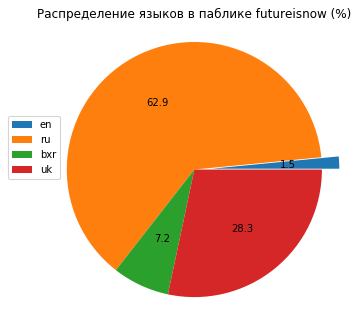

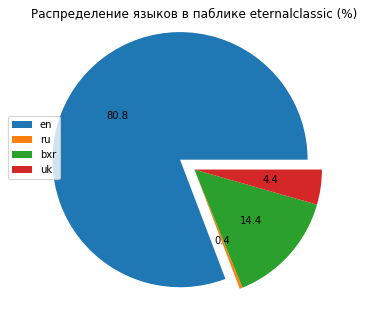

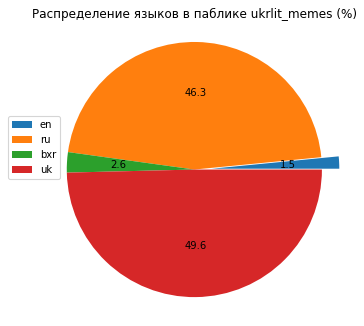

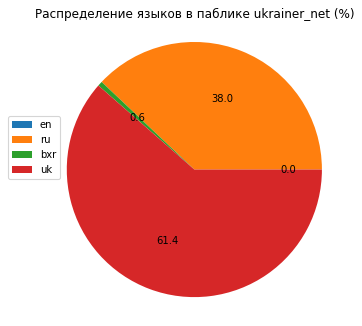

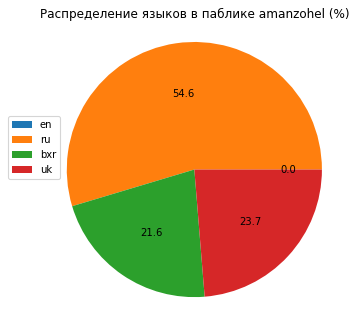

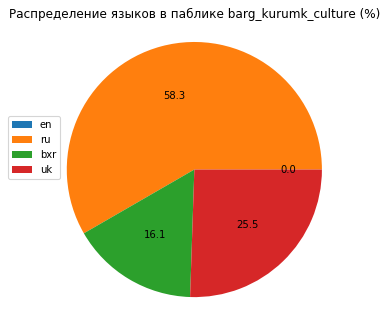

In [59]:
for public in publics:
    lang = []
    count = []
    for i in lang_detects_freqs[public]:
        lang.append(i[0])
        count.append(i[1])

    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
    mpl.rcParams.update({'font.size': 9})
    title = 'Распределение языков в паблике ' + public + ' (%)'
    plt.title(title)

    xs = range(len(lang))

    plt.pie(
        count, autopct='%.1f', radius = 1.1,
        explode = [0.15] + [0 for _ in range(len(lang) - 1)] )
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
        loc = 'lower left', labels = lang )


Сделайте то же самое для определителя на символьных энграммах.

In [63]:
from collections import Counter
lang_detects_ngrams = {}
for public in publics:
    stats = Counter(clf.predict(corpora[public]))
    stats_l = []
    for i in stats:
        ru = 'ru', stats['ru']
        en = 'en', stats['en']
        bxr = 'bxr', stats['bxr']
        uk = 'uk', stats['uk']
    stats_l.extend((ru, en, bxr, uk))

    lang_detects_ngrams[public] = stats_l
print(lang_detects_ngrams)
    

{'futureisnow': [('ru', 704), ('en', 40), ('bxr', 0), ('uk', 1)], 'eternalclassic': [('ru', 1), ('en', 479), ('bxr', 0), ('uk', 0)], 'ukrlit_memes': [('ru', 127), ('en', 4), ('bxr', 2), ('uk', 76)], 'ukrainer_net': [('ru', 104), ('en', 12), ('bxr', 0), ('uk', 69)], 'amanzohel': [('ru', 94), ('en', 0), ('bxr', 62), ('uk', 0)], 'barg_kurumk_culture': [('ru', 101), ('en', 0), ('bxr', 30), ('uk', 0)]}


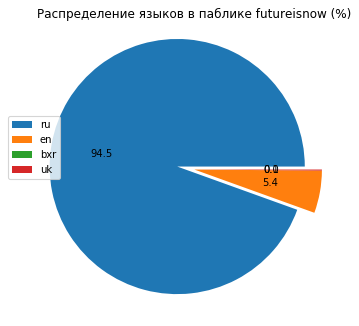

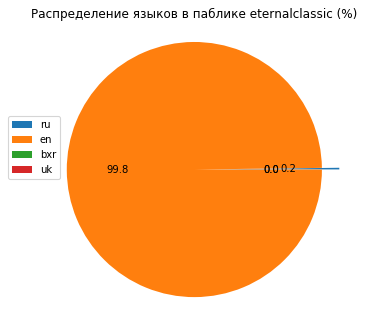

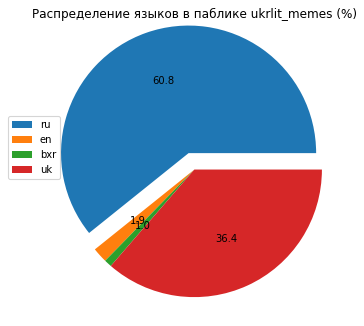

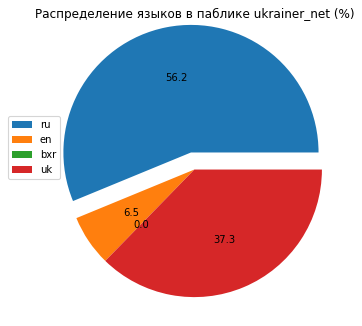

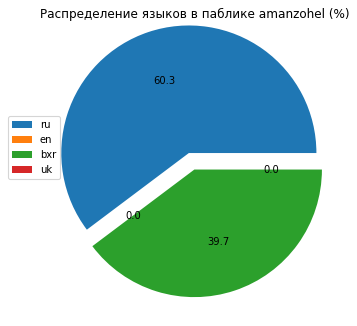

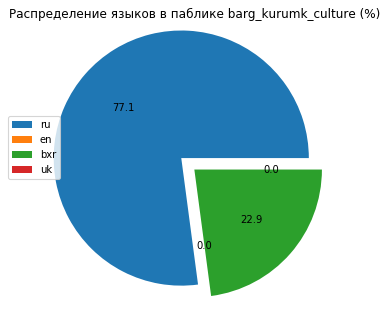

In [61]:
for public in publics:
    lang = []
    count = []
    for i in lang_detects_ngrams[public]:
        lang.append(i[0])
        count.append(i[1])

    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
    mpl.rcParams.update({'font.size': 9})
    title = 'Распределение языков в паблике ' + public + ' (%)'
    plt.title(title)

    xs = range(len(lang))

    plt.pie(
        count, autopct='%.1f', radius = 1.1,
        explode = [0.15] + [0 for _ in range(len(lang) - 1)] )
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
        loc = 'lower left', labels = lang )


Обсудите работу каждого из классификаторов, обсудите ошибки, объясните разницу в результатах.

Вывод:
Судя по получившимся результатам, класификатор, работающий с частотными словарями, показывает менее однозачные результаты, чем классификатор по энгрмамам. 
В данном случае, это может быть свзязано с тем, что в предложенных языках в частотном словаре есть досточно много одинковых вхождений (например предлогов, союзов). Много одинаковых лексем, например, встречаются в русском и украинском языках. 
Это может быть одной из причин неточности определялки. 